## MIDI Visualization

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from utils.musicautobot.numpy_encode import *
from utils.musicautobot.config import *
from utils.musicautobot.music_transformer import *
from utils.musicautobot.multitask_transformer import *
from utils.musicautobot.utils import midifile

2023-03-31 15:56:41.676265: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Example File from the maestro dataset
from pathlib import Path

# Port of the maestro dataset. Add your own path here
midi_file = Path('/Volumes/casdrive/Datasets/maestro-v3.0.0/2006/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_01_Track01_wav.midi')

print(midi_file)

# Vocab defines how the item is represented as a tensor
vocab = MusicVocab.create()

/Volumes/casdrive/Datasets/maestro-v3.0.0/2006/MIDI-Unprocessed_01_R1_2006_01-09_ORIG_MID--AUDIO_01_R1_2006_01_Track01_wav.midi


In [3]:
# Converts MIDI file to MusicItem Object
item = MusicItem.from_file(midi_file, vocab);

/Users/caslabs/Documents/labs/APPLYAI/music-generation/utils/musicautobot/numpy_encode.py:53: StreamIteratorInefficientWarning: highestTime is not defined on StreamIterators. Call .stream() first for efficiency
  highest_time = max(s.flat.getElementsByClass('Note').highestTime, s.flat.getElementsByClass('Chord').highestTime)


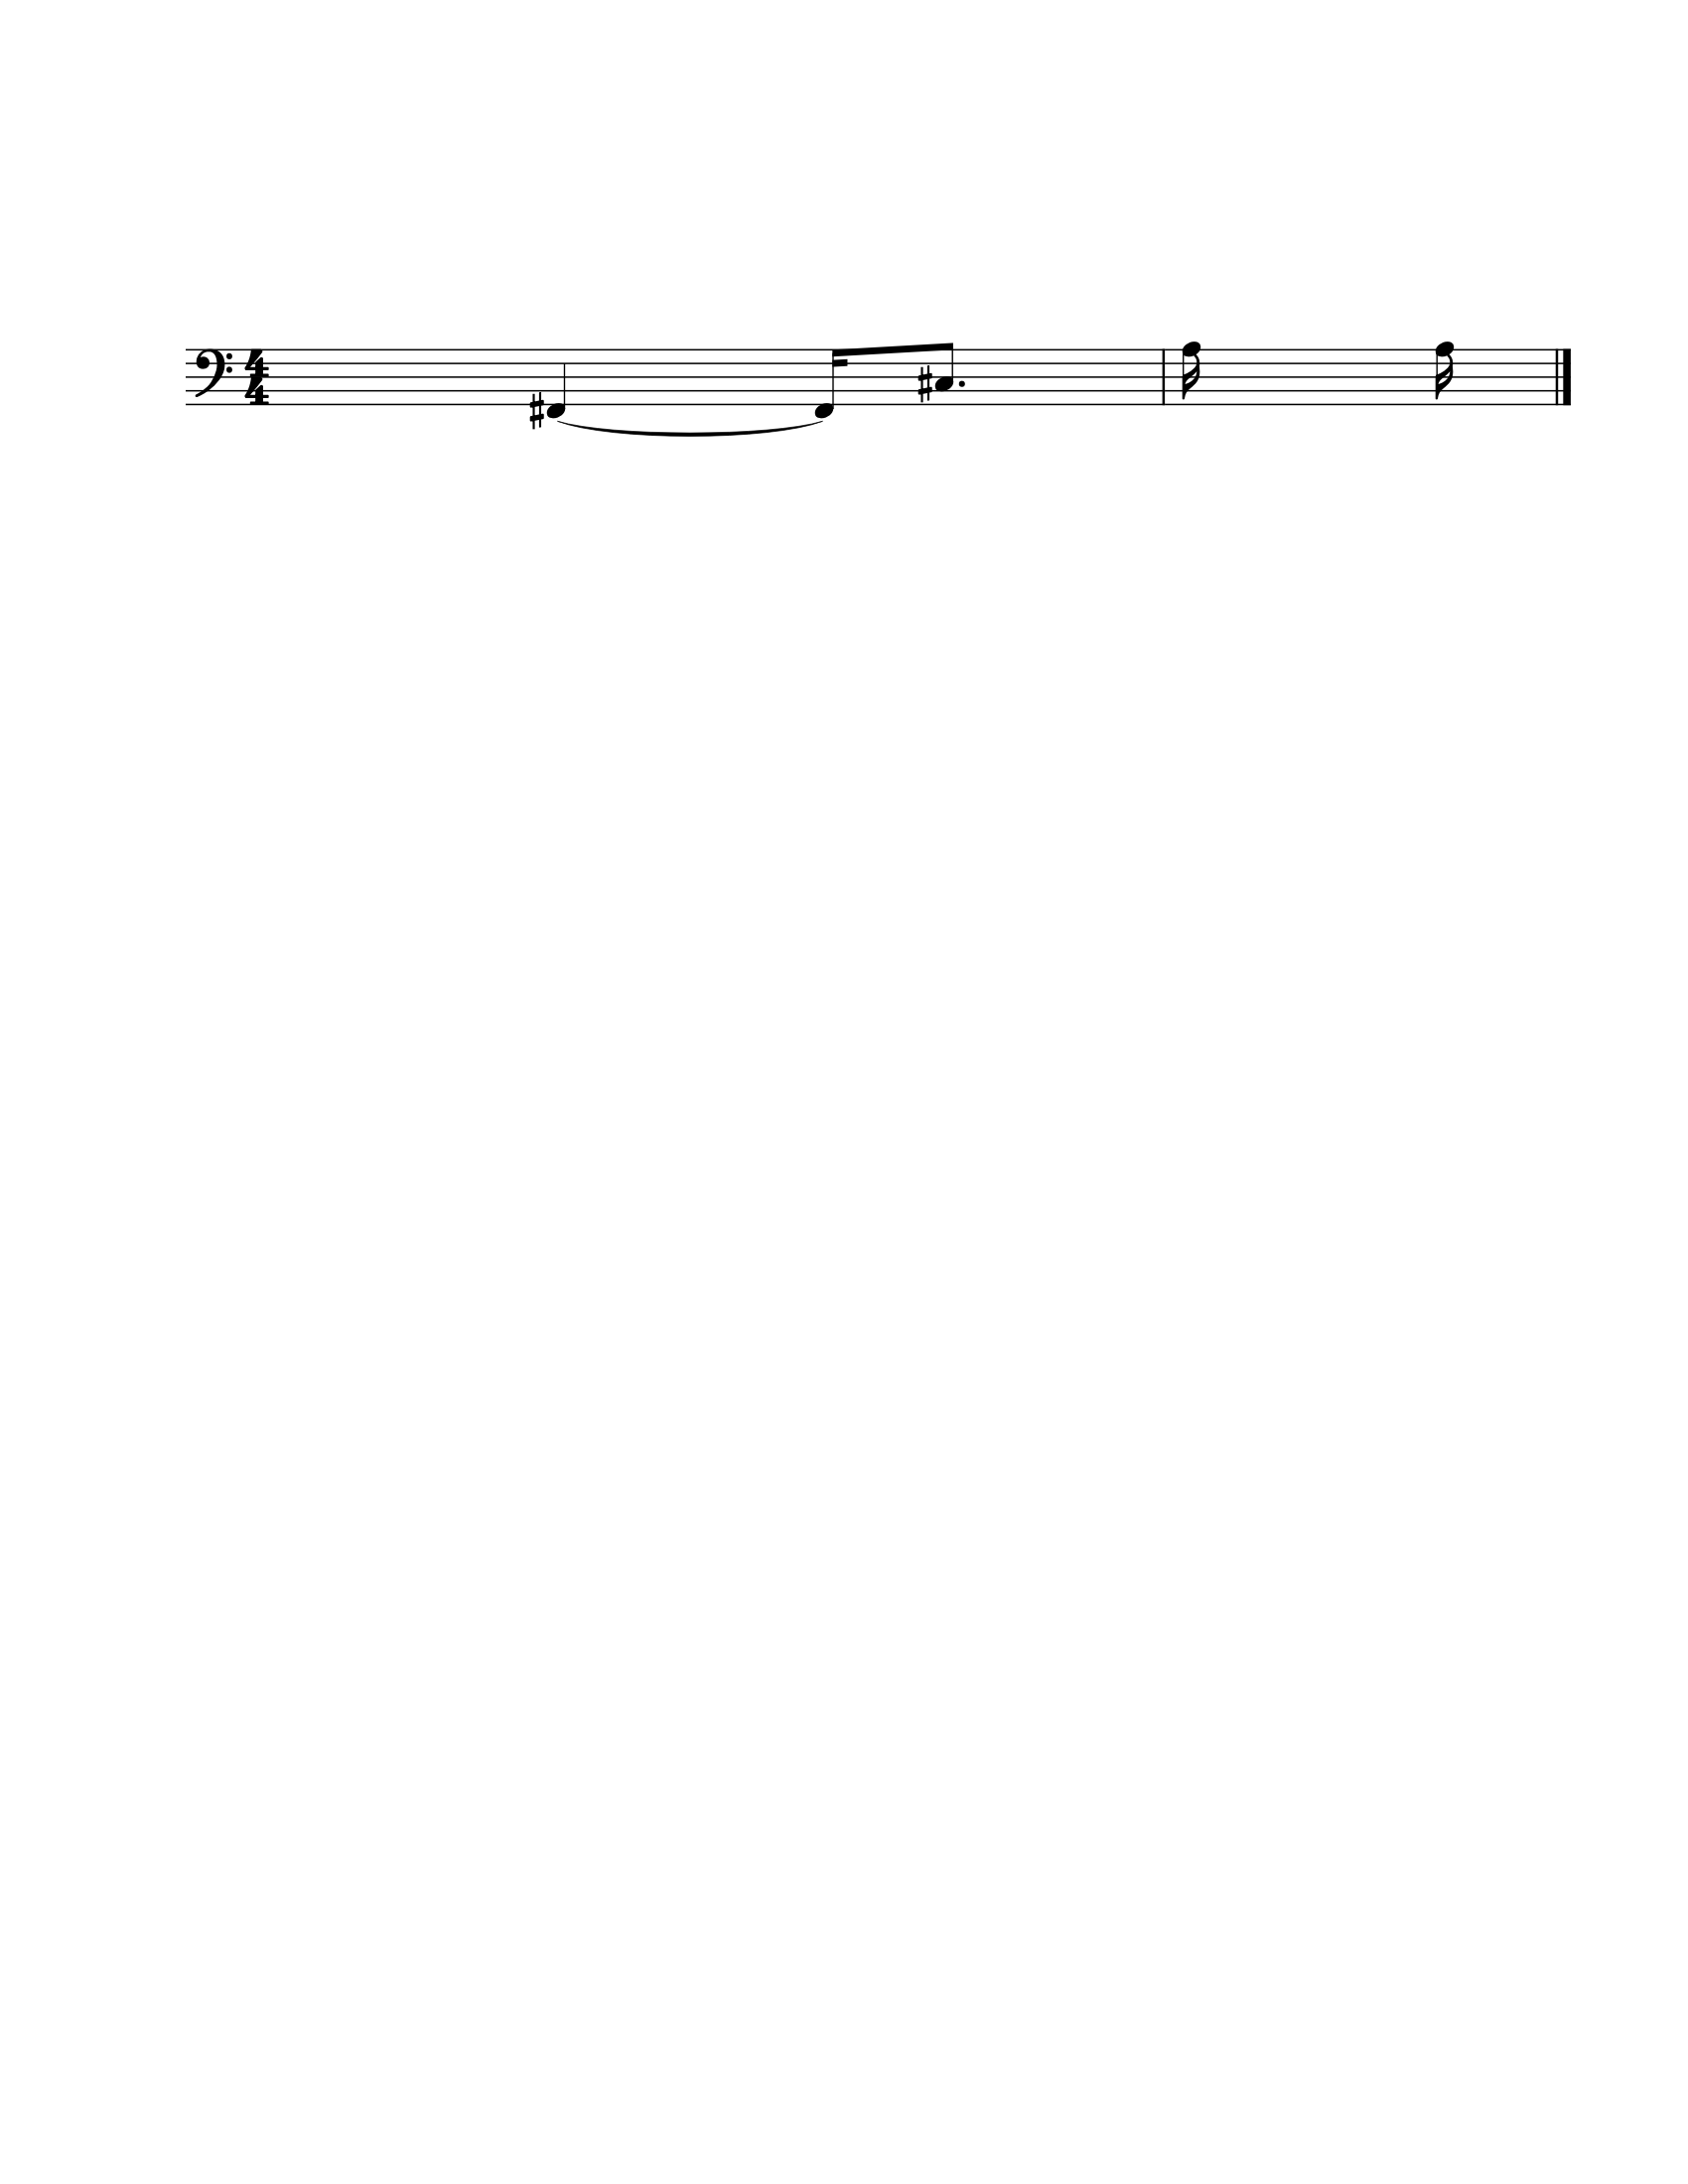

In [10]:
# MusicItem allows us to view the item as a score
# Trim to first quarter note
item.trim_to_beat(5).show()

In [11]:
# Play file:
item.play()

In [7]:
# Tensor representation:
item.to_tensor()

tensor([  0,   1,   8,  ..., 138,  67, 138])

In [44]:
# Text format:
item.to_text() #to_text returns a list of strings that represent the notes
# Count the number of notes
tokens = item.to_text().split()

# Create a counter object for the token frequencies
token_freqs = Counter(tokens)
# Sort
token_freqs = sorted(token_freqs.items(), key=lambda x: x[1], reverse=True)
token_freqs

[('d1', 16478),
 ('xxsep', 6596),
 ('d2', 3923),
 ('d3', 2136),
 ('d4', 1073),
 ('n61', 876),
 ('n69', 738),
 ('n66', 687),
 ('n73', 683),
 ('n59', 642),
 ('d5', 628),
 ('n64', 586),
 ('n62', 583),
 ('n68', 582),
 ('n57', 576),
 ('n71', 531),
 ('n65', 518),
 ('n49', 511),
 ('n63', 480),
 ('n54', 476),
 ('n56', 467),
 ('n78', 405),
 ('n74', 399),
 ('n52', 385),
 ('n58', 382),
 ('n67', 354),
 ('n76', 346),
 ('n75', 329),
 ('n45', 324),
 ('n50', 314),
 ('n70', 313),
 ('n60', 306),
 ('n72', 298),
 ('n81', 292),
 ('n42', 291),
 ('n80', 291),
 ('n47', 290),
 ('n53', 275),
 ('n55', 260),
 ('d6', 241),
 ('n51', 237),
 ('n85', 237),
 ('n77', 233),
 ('n44', 227),
 ('d7', 216),
 ('n37', 194),
 ('n83', 192),
 ('n82', 190),
 ('n46', 185),
 ('n40', 172),
 ('n79', 167),
 ('d8', 149),
 ('n48', 133),
 ('n38', 132),
 ('n34', 121),
 ('n43', 113),
 ('n84', 112),
 ('n41', 108),
 ('d9', 107),
 ('n33', 107),
 ('n86', 97),
 ('n87', 96),
 ('n39', 95),
 ('n35', 88),
 ('n90', 85),
 ('n88', 72),
 ('n36', 62),
 ('

In [45]:
# Music21 Stream
d = item.to_stream().show('text') #to_stream returns a music21 stream
print(d)

{0.0} <music21.stream.Part 0x7fa18a255a20>
    {0.0} <music21.instrument.Piano 'Piano'>
    {2.0} <music21.note.Note F#>
    {3.25} <music21.note.Note C#>
    {4.0} <music21.note.Note A>
    {4.75} <music21.note.Note A>
    {5.0} <music21.note.Note C#>
    {5.5} <music21.note.Note F#>
    {5.75} <music21.note.Note F#>
    {6.25} <music21.note.Note C#>
    {7.0} <music21.note.Note A>
    {7.25} <music21.note.Note C#>
    {7.5} <music21.chord.Chord F#2 F#4>
    {8.0} <music21.note.Note F#>
    {8.0} <music21.note.Note F#>
    {8.75} <music21.note.Note C#>
    {9.25} <music21.note.Note A>
    {9.75} <music21.note.Note A>
    {10.0} <music21.note.Note C#>
    {10.5} <music21.note.Note F#>
    {10.75} <music21.note.Note F#>
    {11.25} <music21.note.Note C#>
    {11.75} <music21.chord.Chord A3 C#4>
    {12.0} <music21.note.Note C#>
    {12.25} <music21.note.Note F#>
    {12.25} <music21.note.Note D>
    {13.25} <music21.note.Note D>
    {13.75} <music21.note.Note B>
    {14.0} <music21.note

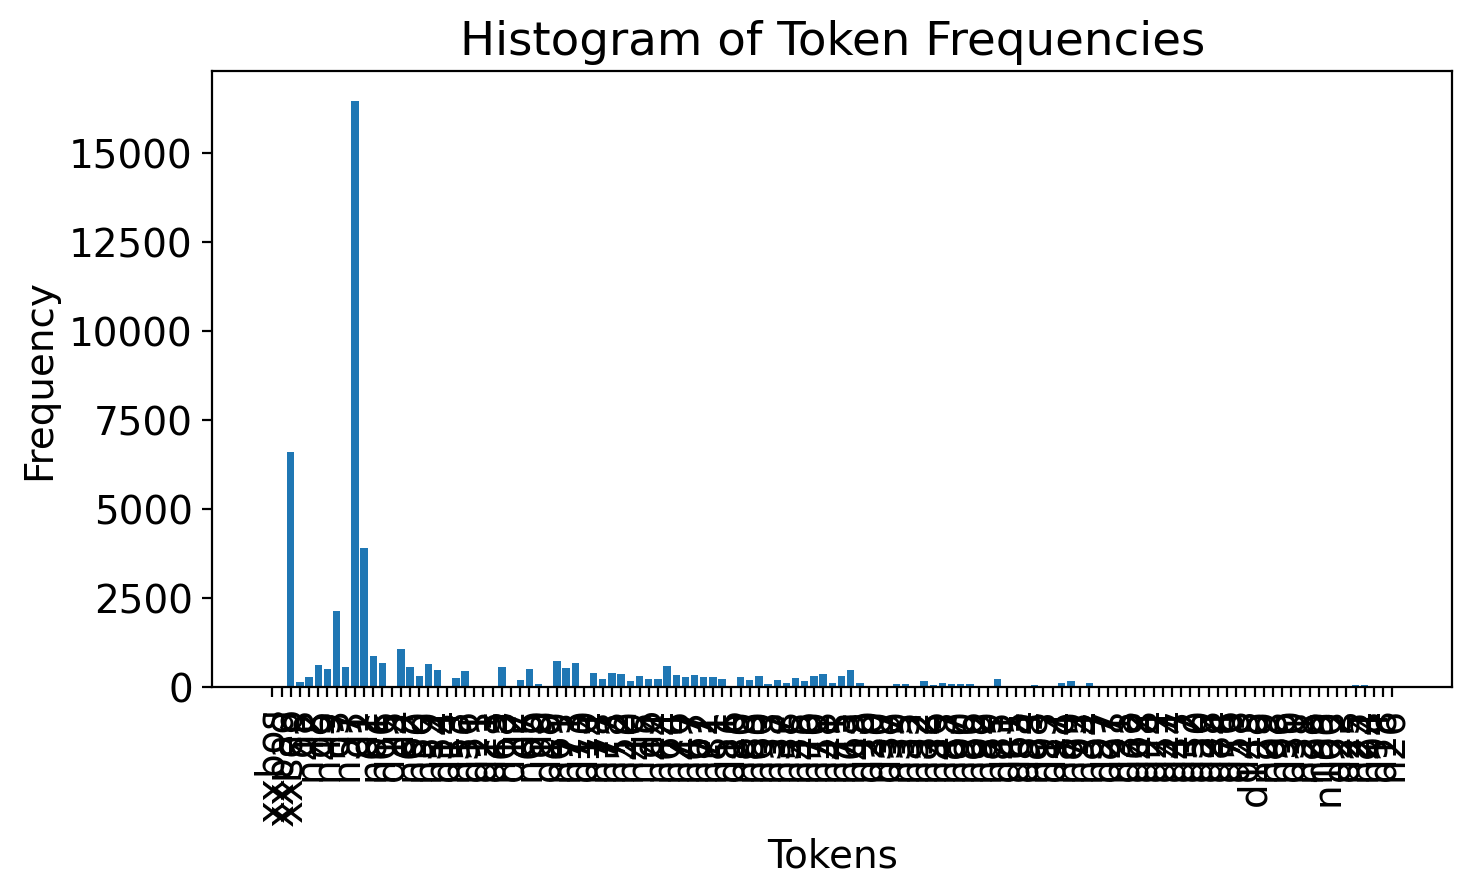

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

# Define the font size for the plot
plt.rcParams.update({'font.size': 14})

# Create the plot figure
fig, ax = plt.subplots(figsize=(8, 4))

# Split the input text into tokens

tokens = item.to_text().split()

# Create a counter object for the token frequencies
token_freqs = Counter(tokens)

# Plot the token frequencies as a histogram
ax.bar(token_freqs.keys(), token_freqs.values())

# Rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Set the plot title and axis labels
ax.set_title('Histogram of Token Frequencies')
ax.set_xlabel('Tokens')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()